# Market Analysis

Will be analised data from freeCodeCamp to find the two best markets to advertise web and mobile development.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
codecamp = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = False)
codecamp.shape

(18175, 136)

In [3]:
codecamp.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for column in codecamp.columns:
    print(column)

Age
AttendedBootcamp
BootcampFinish
BootcampLoanYesNo
BootcampName
BootcampRecommend
ChildrenNumber
CityPopulation
CodeEventConferences
CodeEventDjangoGirls
CodeEventFCC
CodeEventGameJam
CodeEventGirlDev
CodeEventHackathons
CodeEventMeetup
CodeEventNodeSchool
CodeEventNone
CodeEventOther
CodeEventRailsBridge
CodeEventRailsGirls
CodeEventStartUpWknd
CodeEventWkdBootcamps
CodeEventWomenCode
CodeEventWorkshops
CommuteTime
CountryCitizen
CountryLive
EmploymentField
EmploymentFieldOther
EmploymentStatus
EmploymentStatusOther
ExpectedEarning
FinanciallySupporting
FirstDevJob
Gender
GenderOther
HasChildren
HasDebt
HasFinancialDependents
HasHighSpdInternet
HasHomeMortgage
HasServedInMilitary
HasStudentDebt
HomeMortgageOwe
HoursLearning
ID.x
ID.y
Income
IsEthnicMinority
IsReceiveDisabilitiesBenefits
IsSoftwareDev
IsUnderEmployed
JobApplyWhen
JobInterestBackEnd
JobInterestDataEngr
JobInterestDataSci
JobInterestDevOps
JobInterestFrontEnd
JobInterestFullStack
JobInterestGameDev
JobInterestInfoSec


In [5]:
print(codecamp.JobRoleInterest.isnull().sum())

jobInterested = codecamp[codecamp.JobRoleInterest.notnull()].copy()

11183


11183 people did not ansewered the job role interested, I will keep only the data from people that ansewered this question

In [6]:
jobInterested.JobRoleInterest.value_counts(normalize = True).head(20)

Full-Stack Web Developer                                                       0.117706
  Front-End Web Developer                                                      0.064359
  Data Scientist                                                               0.021739
Back-End Web Developer                                                         0.020309
  Mobile Developer                                                             0.016733
Game Developer                                                                 0.016304
Information Security                                                           0.013158
Full-Stack Web Developer,   Front-End Web Developer                            0.009153
  Front-End Web Developer, Full-Stack Web Developer                            0.008009
  Product Manager                                                              0.007866
Data Engineer                                                                  0.007580
  User Experience Designer      

The survey shows that people often wants more than one job. So will be better select all people that want at least one o the things that the company offer

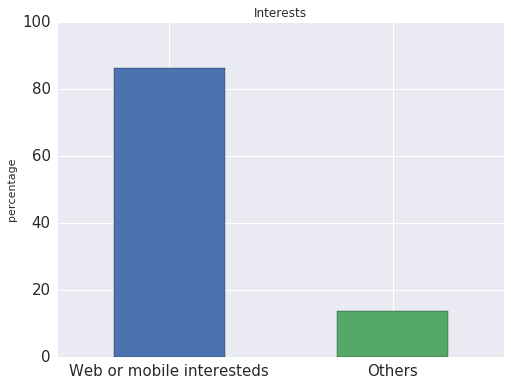

In [7]:
(jobInterested.JobRoleInterest.str.lower().str.contains('web|mobile')\
.value_counts(normalize = True)*100).rename({True: 'Web or mobile interesteds', False:'Others'})\
.plot.bar(figsize = (8,6), fontsize = 15)
plt.xticks(rotation = 0)
plt.title('Interests')
plt.ylabel('percentage')
plt.ylim(0, 100)
plt.show()

The majority of the people that are studing wants the courses of Web and mobile develpment. Know we can check where this people are.

In [8]:
pd.DataFrame(jobInterested.CountryLive.value_counts()).merge(
pd.DataFrame(jobInterested.CountryLive.value_counts(normalize = True)*100),
    left_index = True, right_index = True).rename(columns = {'CountryLive_x':'country_quantity', 'CountryLive_y': 'Country_percentage'})

,country_quantity,Country_percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


More than 50% of the programers are in 4 countries that have english as on of the official lenguages. So will continue the analysis with this contries.

In [9]:
# checking in this countries of the total of developers how many pay to study.
countries = ['United States of America','India','United Kingdom','Canada']
jobInterested.loc[(jobInterested.MonthsProgramming == 0), 'MonthsProgramming'] = 1
jobInterested['MoneyPerMonth'] = jobInterested.MoneyForLearning/jobInterested.MonthsProgramming
selectedCountries = jobInterested[jobInterested.CountryLive.apply(lambda x: x in countries)].copy()

In [10]:
(selectedCountries.MoneyPerMonth.agg(pd.notnull).value_counts(normalize = True)*100).rename({True: 'Pay to learn', False: 'Do not pay to learn'})

Pay to learn           92.596973
Do not pay to learn     7.403027
Name: MoneyPerMonth, dtype: float64

It is possible notice that 95% of the people that ansewered the survey are disposed to pay to learn. Now will check how much they pay for it.

In [11]:
payLearners = selectedCountries[selectedCountries.MoneyPerMonth > 0].copy()

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



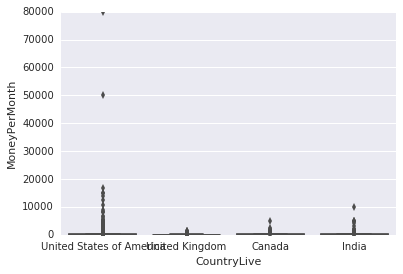

In [12]:
sns.boxplot(data = payLearners, x = 'CountryLive', y = 'MoneyPerMonth')
plt.figure(figsize = (8,5))
plt.show()

In [13]:
means = payLearners[['CountryLive', 'MoneyPerMonth']].groupby('CountryLive').mean().to_dict()['MoneyPerMonth']
stdDeviation = payLearners[['CountryLive', 'MoneyPerMonth']].groupby('CountryLive').std(ddof = 1).to_dict()['MoneyPerMonth']

In [21]:
payLearners['z_score'] = payLearners[['CountryLive', 'MoneyPerMonth']]\
.apply(lambda x: (x[1] - means[x[0]])/stdDeviation[x[0]], axis = 1)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



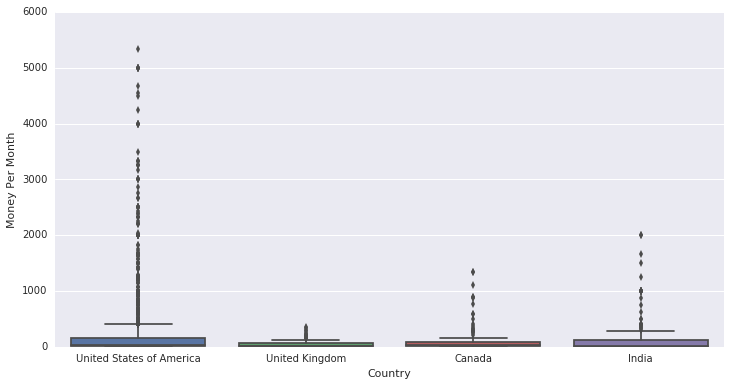

In [26]:
# removing outliers
plt.figure(figsize = (12,6))
sns.boxplot(data = payLearners[payLearners.z_score <= 2], x = 'CountryLive', y = 'MoneyPerMonth')
plt.xlabel('Country')
plt.ylabel('Money Per Month')
plt.show()

In [30]:
payLearnersModerates =  payLearners[payLearners.z_score <= 2].copy()

Now e can check between the pay lerarners how many can pay more than $59

In [35]:
payLearnersModerates['more_than_59'] = payLearnersModerates.MoneyPerMonth > 59

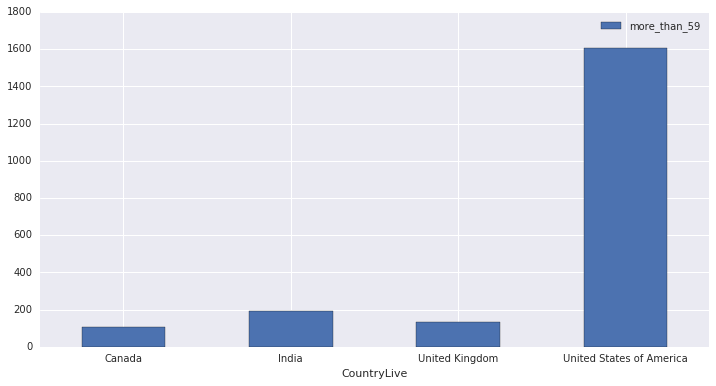

In [51]:
payLearnersModerates[['CountryLive','more_than_59']].groupby('CountryLive').count().plot.bar(figsize = (12,6))
plt.xticks(rotation = 0)

plt.show()

Advertising in USA makes more sense because the number of people that are able to pay for the course and of developers is higher than any other place.